### Image Keypoints 

- 이미지 특징점 - 이미지의 특징이 되는 부분
- 보통 물체의 모서리 or 코너에 해당함


## Harris Corner Detection

- 해리스 코너 검출
- 삼각형, 사각형과 같은 다각형은 n개의 꼭짓점을 갖고 있기 때문이다.
- 이 꼭지점들을 보고 n각형이라고 인지하는것을 바탕으로, 특정 물체를 볼 때 꼭지점을 유심히 보는 경향이 있다고 추정
- 물체를 인식할때 물체의 코너부분에 관심을 둔다.
- Sobel 미분으로 경계값을 검출하면서, 경계값의 경사도 변화량을 측정하여, 변화량이 수직/수평/대각성 방향으로 크게 변화하는 것을 코너로 판단한다.


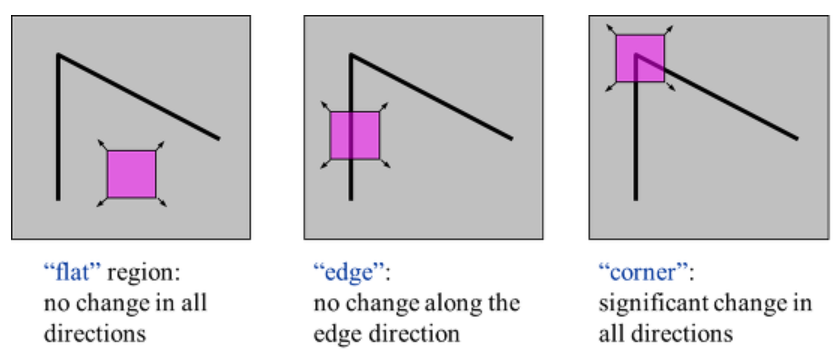

#### dst = cv2.cornerHarris(src, blockSize, ksize, k, dst, borderType)
- src: 입력 이미지, 그레이 스케일
- blockSize: 이웃 픽셀 범위
- ksize: 소벨 미분 필터 크기
- k(optional): 코너 검출 상수 (보토 0.04~0.06)
- dst(optional): 코너 검출 결과 (src와 같은 크기의 1 채널 배열, 변화량의 값, 지역 최대 값이 코너점을 의미)
- borderType(optional): 외곽 영역 보정 형식

In [1]:
import cv2
import numpy as np

img = cv2.imread('RC/5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출
corner = cv2.cornerHarris(gray, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기
for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))
cv2.imshow('Harris Corner', merged)
cv2.waitKey()
cv2.destroyAllWindows()

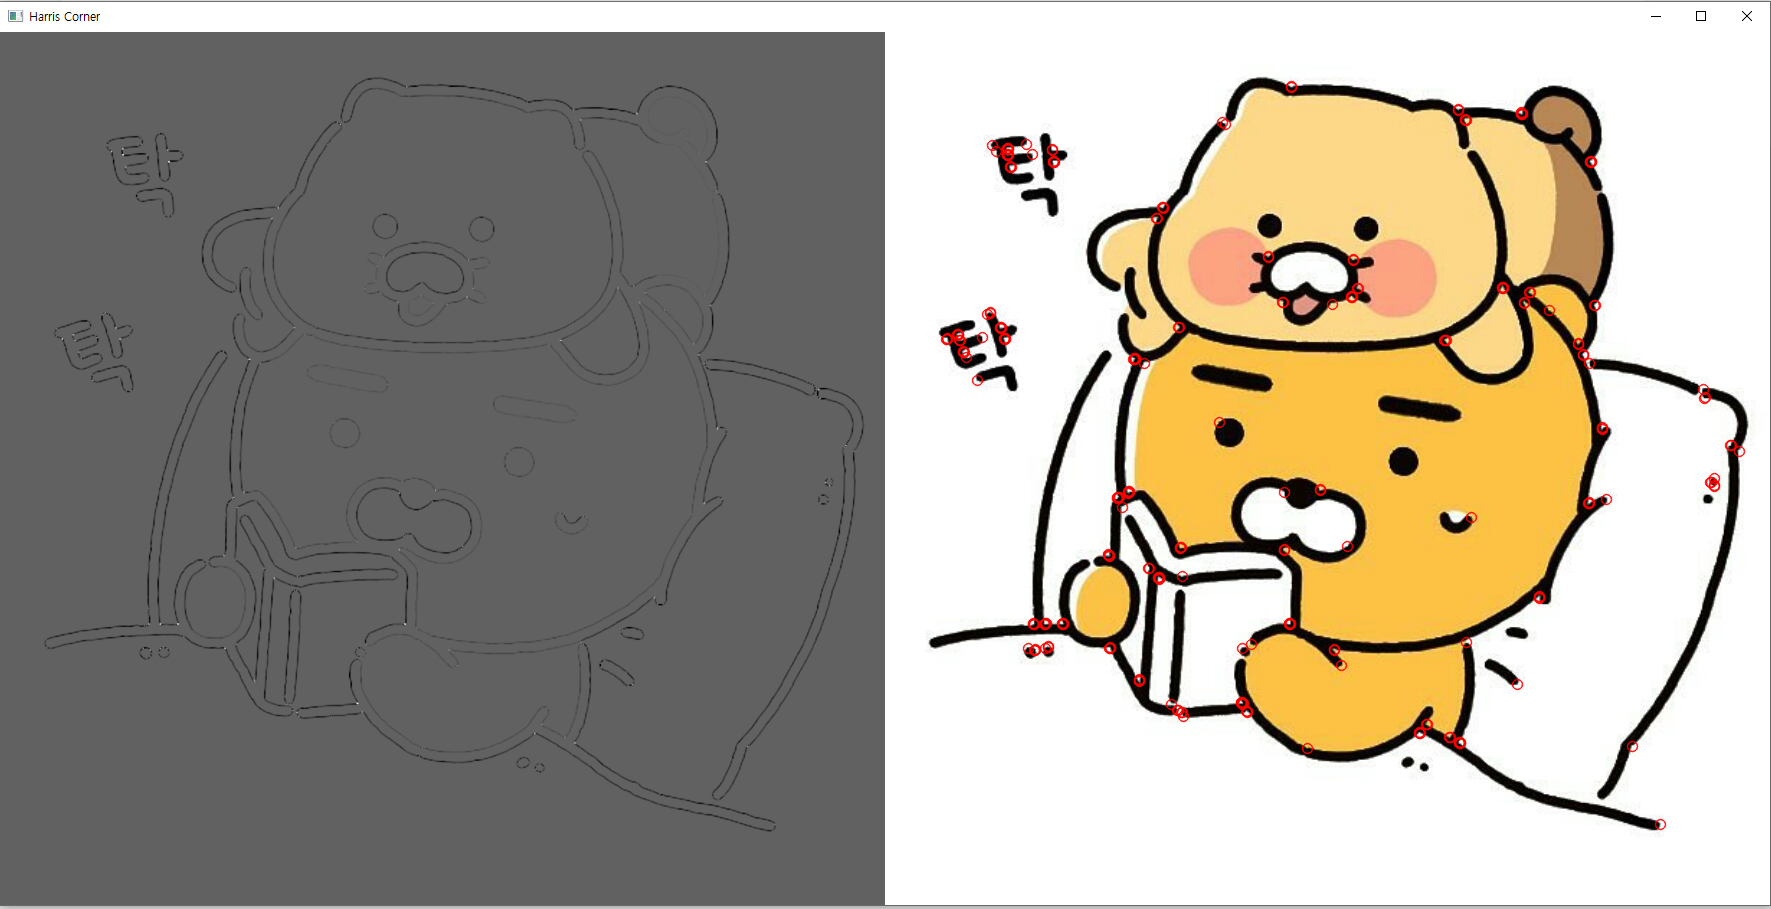

In [2]:
import cv2
import numpy as np

img = cv2.imread('RC/5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 시-토마스의 코너 검출 메서드
corners = cv2.goodFeaturesToTrack(gray, 80, 0.01, 10)
# 실수 좌표를 정수 좌표로 변환
corners = np.int32(corners)

# 좌표에 동그라미 표시
for corner in corners:
    x, y = corner[0]
    cv2.circle(img, (x, y), 5, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('Corners', img)
cv2.waitKey()
cv2.destroyAllWindows()

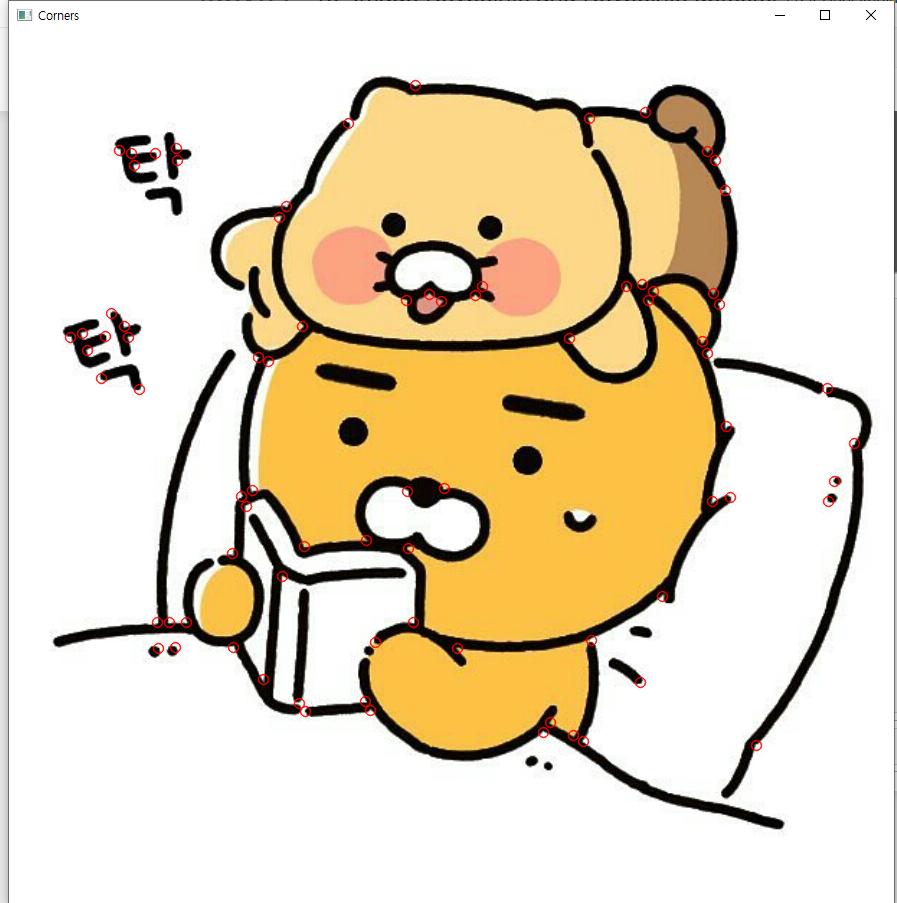

## 특징점 검출 함수
### keypoints = detector.detect(img, mask)
- img = 입력 이미지
- mask(optional) = 검출 제외 마스크
- keypoints = 특징점 검출 결과(Keypoints 리스트)

### Keypoint = 특징점 정보를 담는 객체
- pt = (x, y) float type으로, 정수 변환 필요
- size = 의미있는 특징점 이웃 반지름
- angle = 특징점 방향(시계방향)
- response = 특징점 반응 강도
- octave = 발견된 이미지 피라미드 계층
- class_id = 특징점이 속한 객체 ID

## 특징점 표시 함수
### outImg = cv2.drawKeypoints(img, keypoints, outImg, color, flags)
- img: 입력 이미지
- keypoints: 표시할 특징점 리스트
- outImg: 특징점이 그려진 결과 이미지
- color(optional): 표시할 색상 (default: 랜덤)
- flags(optional): 표시 방법 (cv2.DRAW_MATCHES_FLAGS_DEFAULT: 좌표 중심에 동그라미만 그림(default), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: 동그라미의 크기를 size와 angle을 반영해서 그림)

## GFTTDetector
- cv2.goodFeaturesToTrack() 함수로 구현됨 특징점 검출기

### detector = cv2.GFTTDetector_create(img, maxCorners, qualityLevel, minDistance, corners, mask, blockSize, useHarrisDetector, k)

- 모든 Parameter는 cv2.goodFeaturesToTrack()과 동일

In [5]:
import cv2
import numpy as np

img = cv2.imread('RC/5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# GFTT 검출기 생성
gftt = cv2.GFTTDetector_create()

# 특징점 검출
keypoints = gftt.detect(gray, None)

# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

cv2.imshow('GFTTDetector', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

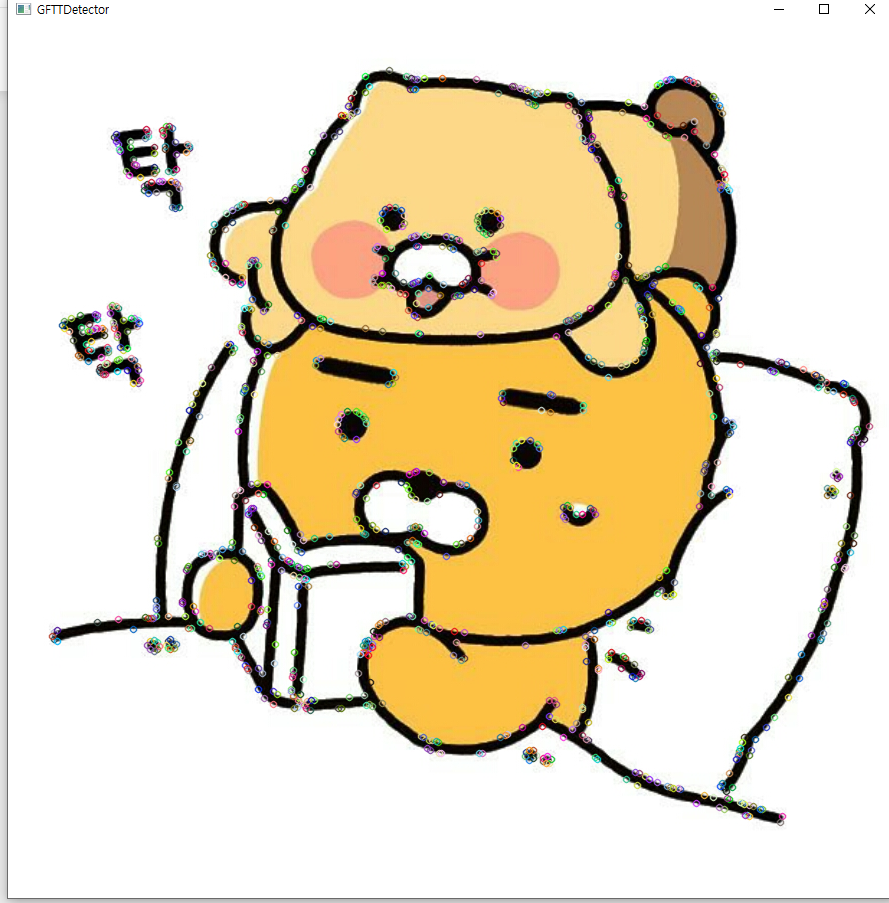

## FAST(Feature from Accelerated Segment Test)

- 기존 검출기보다 속도가 향상된 검출기
- 코너 검출시 미분연산응 하지 않고, 픽셀 중심으로 특정 개수의 픽셀로 원을 그려서, 그 안의 픽셀들이 중심 픽셀 값보다 임계값 이상 밝거나 어두운 것이 일정 개수 존재하면 코너로 판단한다.

### detector = cv2.FastFeatureDetector_create(threshold, nonmaxSuppression, type)
- threshold(optinal) = 코너 판단 임계 값 , default = 10
- nonmaxSuppression(optional) = 최대 점수가 아닌 코너 억제, default = True
- type(optional) = 엣지 검출 패턴
    - cv2.FastFeatureDetector_TYPE_9_16 = 16개 중 9개 연속 (default)
    - cv2.FeatFeatureDetector_TYPE_7_12 = 12개 중 7개 연속
    - cv2.FastFeatureDetector_TYPE_5_8 = 8개 중 5개 연속

In [7]:
import cv2
import numpy as np

img = cv2.imread('RC/5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# FAST 특징 검출기 생성
fast = cv2.FastFeatureDetector_create(50)

# 특징점 검출
keypoints = fast.detect(gray, None)

# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

cv2.imshow('FAST', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

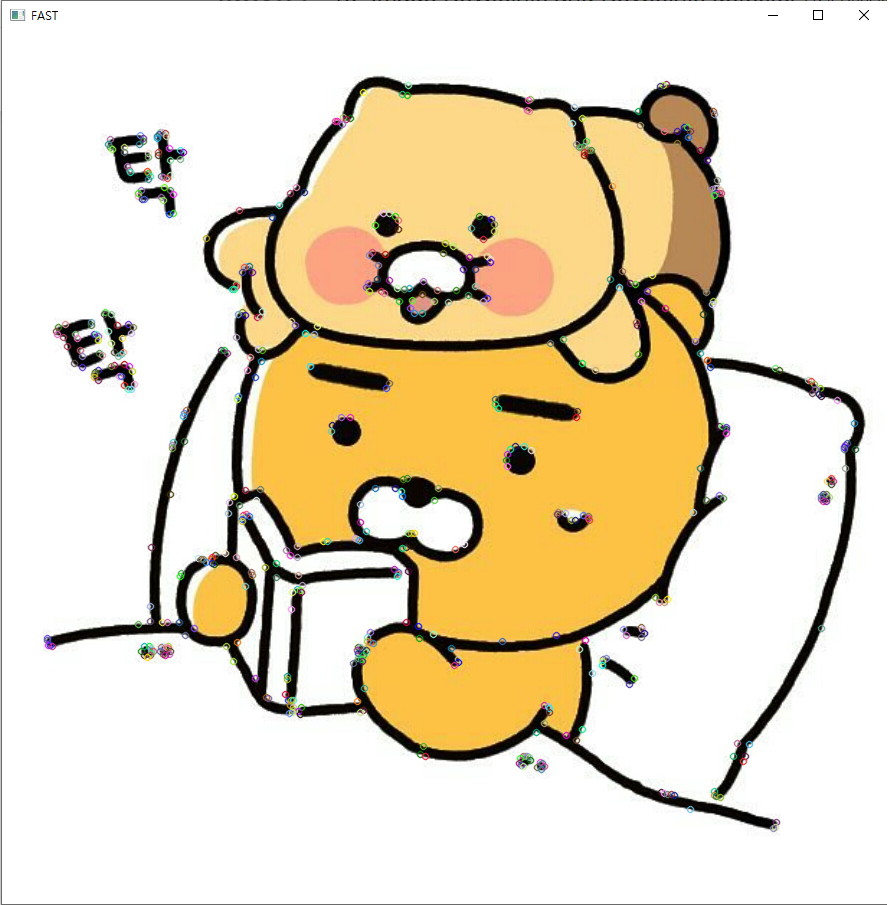

### SimpleBlobDetector
- BLOB(Binary Large OBject)는 2진 Scale로 연결된 픽셀 그룹을 말합니다.
- SimpleBlobDetector는 자잘한 객체는 노이즈로 여기고, 특정 크기 이상의 큰 객체만 찾아내는 검출기입니다.

#### 한마디로 자잘한 코너는 노이즈로 간주하고, 특정 크기 이상의 객체만 검출한다.

### detector = cv2.SimpleBlobDetector_create([parameters])
- minThreshold, maxThreshold, thresholdStep: BLOB를 생성하기 위한 경계 값
(minThreshold에서 maxThreshold를 넘지 않을 때까지 thresholdStep만큼 증가)
- minRepeatability: BLOB에 참여하기 위한 연속된 경계 값의 개수
- minDistBetweenBlobs: 두 BLOB을 하나의 BLOB으로 간주하는 거리
- filterByArea: 면적 필터 옵션
- minArea, maxArea: min~max 범위의 면적만 BLOB으로 검출
- filterByCircularity: 원형 비율 필터 옵션
- minCircularity, maxCircularity: min~max 범위의 원형 비율만 BLOB으로 검출
- filterByColor: 밝기를 이용한 필터 옵션
- blobColor: 0 = 검은색 BLOB 검출, 255 = 흰색 BLOB 검출
- filterByConvexity: 볼록 비율 필터 옵션
- minConvexity, maxConvexity: min~max 범위의 볼록 비율만 BLOB으로 검출
- filterByInertia: 관성 비율 필터 옵션
- minInertiaRatio, maxInertiaRatio: min~max 범위의 관성 비율만 BLOB으로 검출

In [8]:
import cv2
import numpy as np

img = cv2.imread('RC/5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SimpleBlobDetector 생성
detector = cv2.SimpleBlobDetector_create()

# 특징점 검출
keypoints = detector.detect(gray)

# 특징점 빨간색으로 표시
img = cv2.drawKeypoints(img, keypoints, None, (0, 0, 255), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow("Blob", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

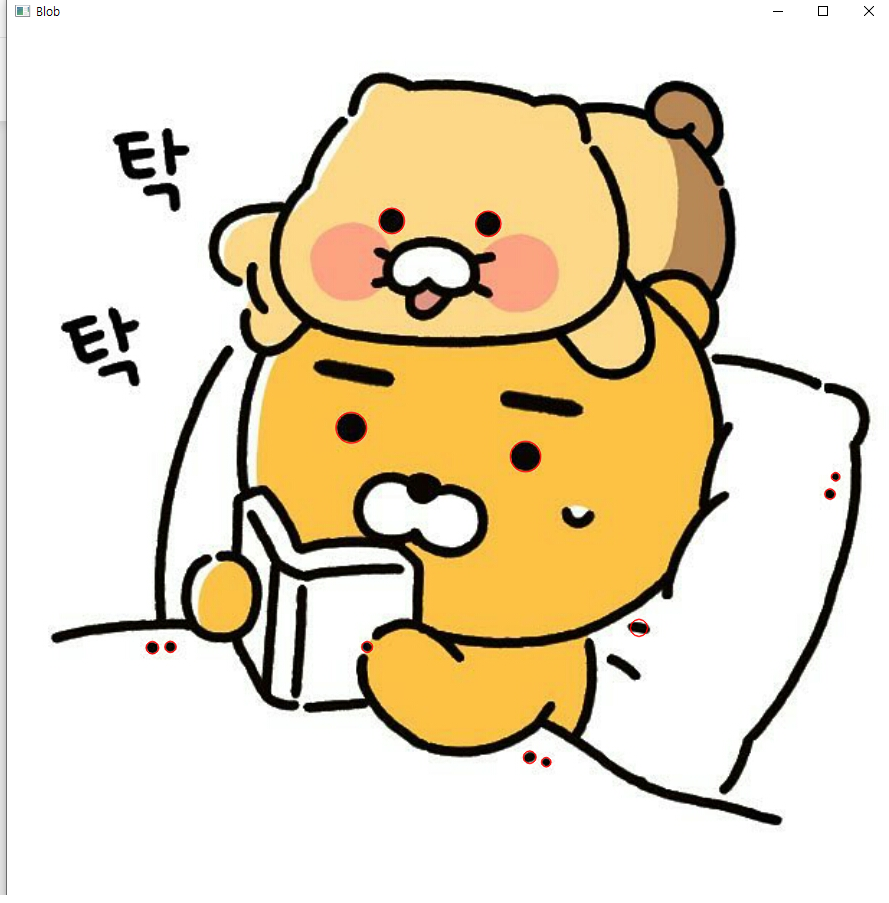

- 위의 Blob을 통한 검출은, 많은 객체를 검출하지 못한다. 
- 이 부분을 해결하기 위해 필터 옵션을 주어 실행해 보면?

In [10]:
import cv2
import numpy as np

img = cv2.imread('RC/5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blob 필터 파라미터
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10
params.maxThreshold = 240
params.thresholdStep = 5

params.filterByArea = True
params.minArea = 200

params.filterByColor = False
params.filterByConvexity = False
params.filterByInertia = False
params.filterByCircularity = False

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(gray)

img_draw = cv2.drawKeypoints(img, keypoints, None, None, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Blob with Params', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

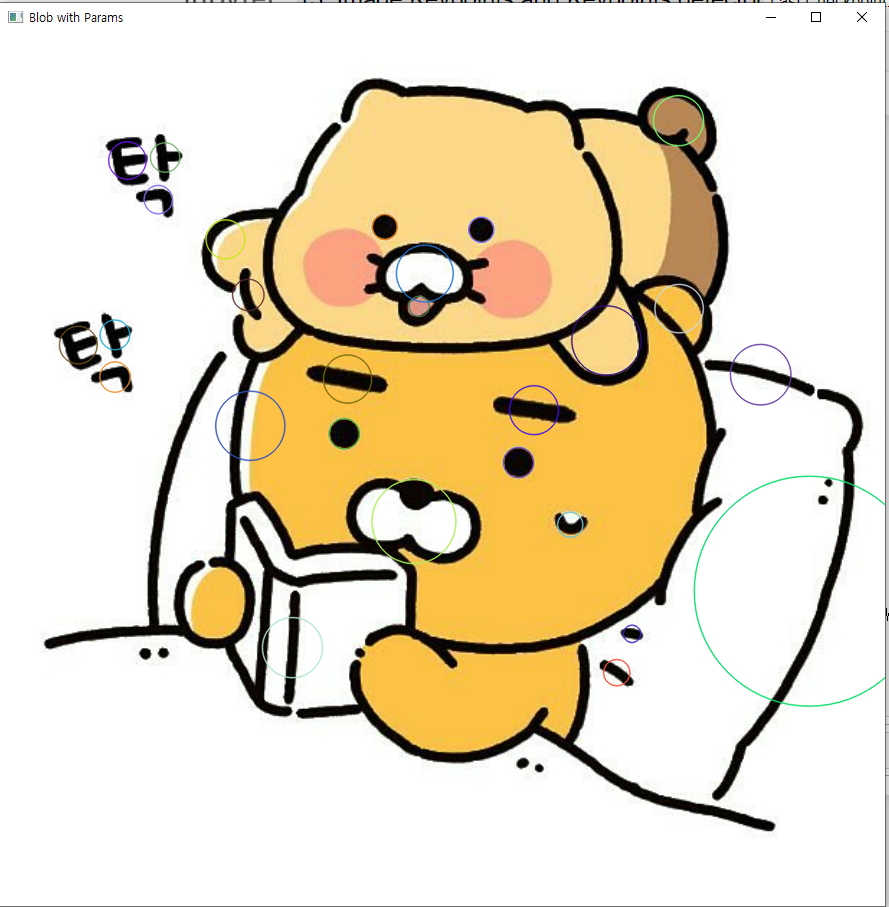